In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Import required packages from EDA
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Capstone Project/diabetes.csv")

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

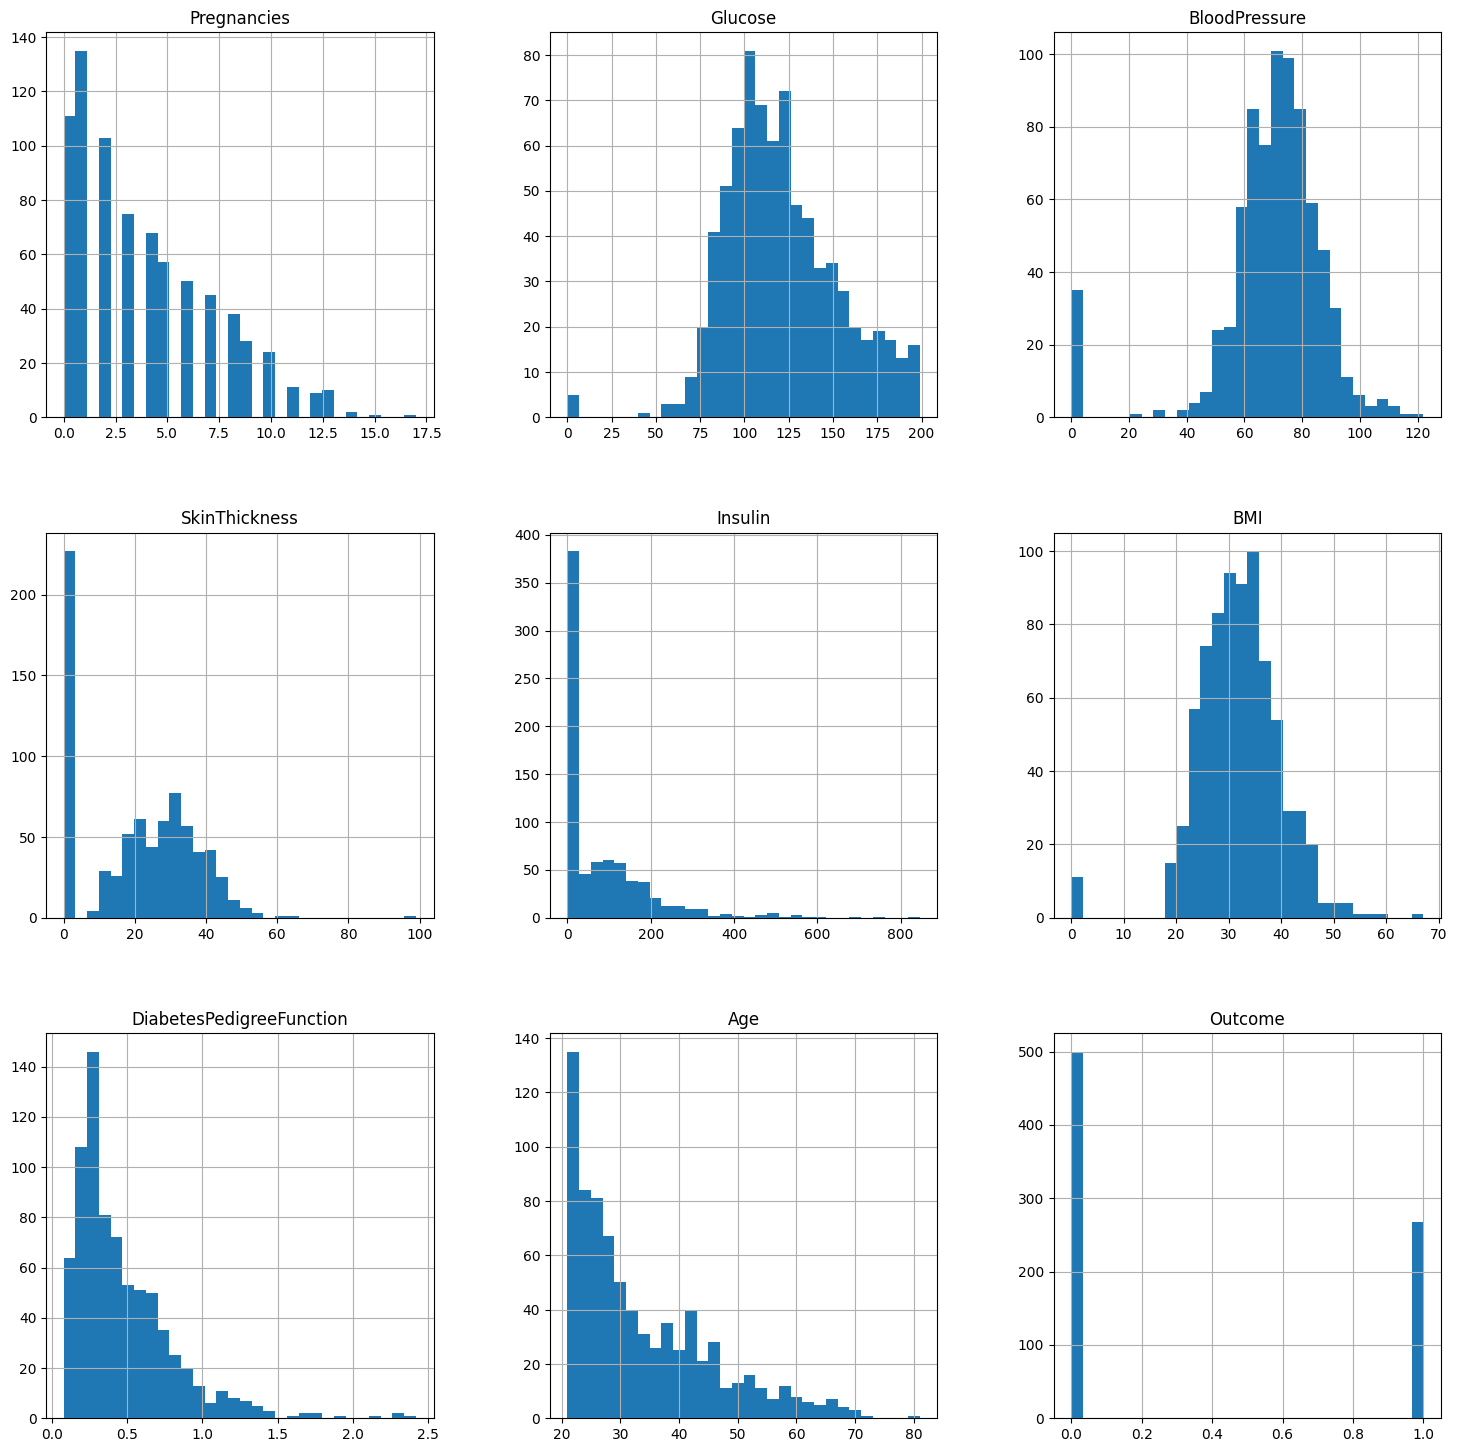

In [ ]:
fig = plt.figure(figsize=(18,18))
ax= fig.gca()
df.hist(ax=ax,bins =30)
plt.show()

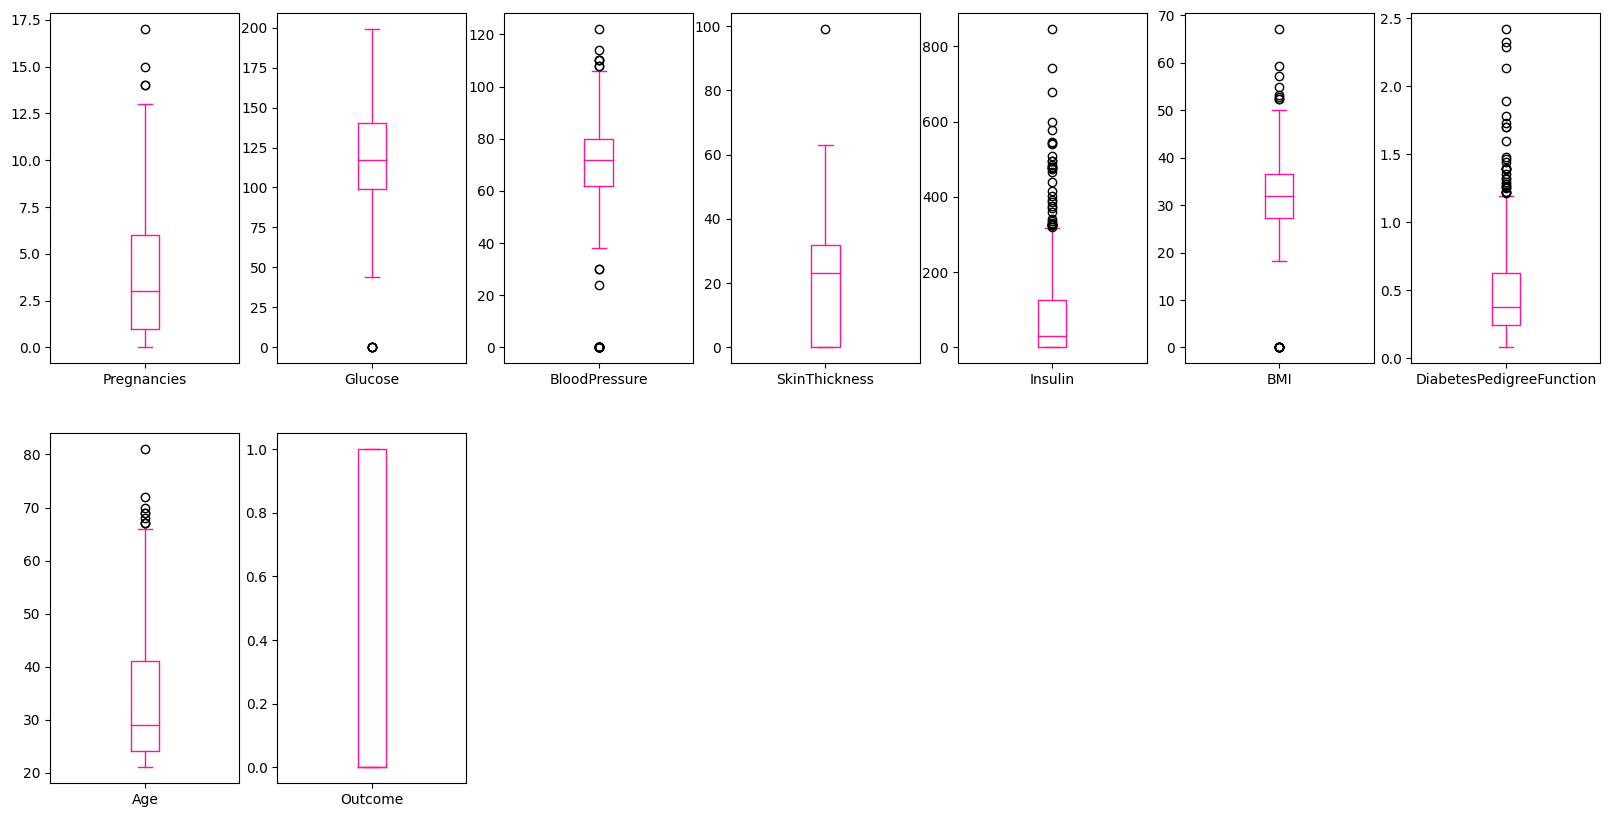

In [ ]:
df.plot(kind='box', subplots=True,layout=(2,7),sharex=False,sharey=False, figsize=(20,10),color='deeppink');

In [ ]:
#identify the outliers
# define continuous variable & plot
continous_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']  
def outliers(df_out, drop = False):
  for each_feature in df_out.columns:
    feature_data = df_out[each_feature]
    Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
    Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
    IQR = Q3-Q1 #Interquartile Range
    outlier_step = IQR * 1.5 #That's we were talking about above
    outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
    if not drop:
      print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
    if drop:
       df.drop(outliers, inplace = True, errors = 'ignore')
       print('Outliers from {} feature removed'.format(each_feature))
outliers(df[continous_features])

For the feature Pregnancies, No of Outliers is 4
For the feature Glucose, No of Outliers is 5
For the feature BloodPressure, No of Outliers is 45
For the feature SkinThickness, No of Outliers is 1
For the feature Insulin, No of Outliers is 34
For the feature BMI, No of Outliers is 19
For the feature DiabetesPedigreeFunction, No of Outliers is 29
For the feature Age, No of Outliers is 9
For the feature Outcome, No of Outliers is 0


In [ ]:
outliers(df[continous_features], drop = True)

Outliers from Pregnancies feature removed
Outliers from Glucose feature removed
Outliers from BloodPressure feature removed
Outliers from SkinThickness feature removed
Outliers from Insulin feature removed
Outliers from BMI feature removed
Outliers from DiabetesPedigreeFunction feature removed
Outliers from Age feature removed
Outliers from Outcome feature removed


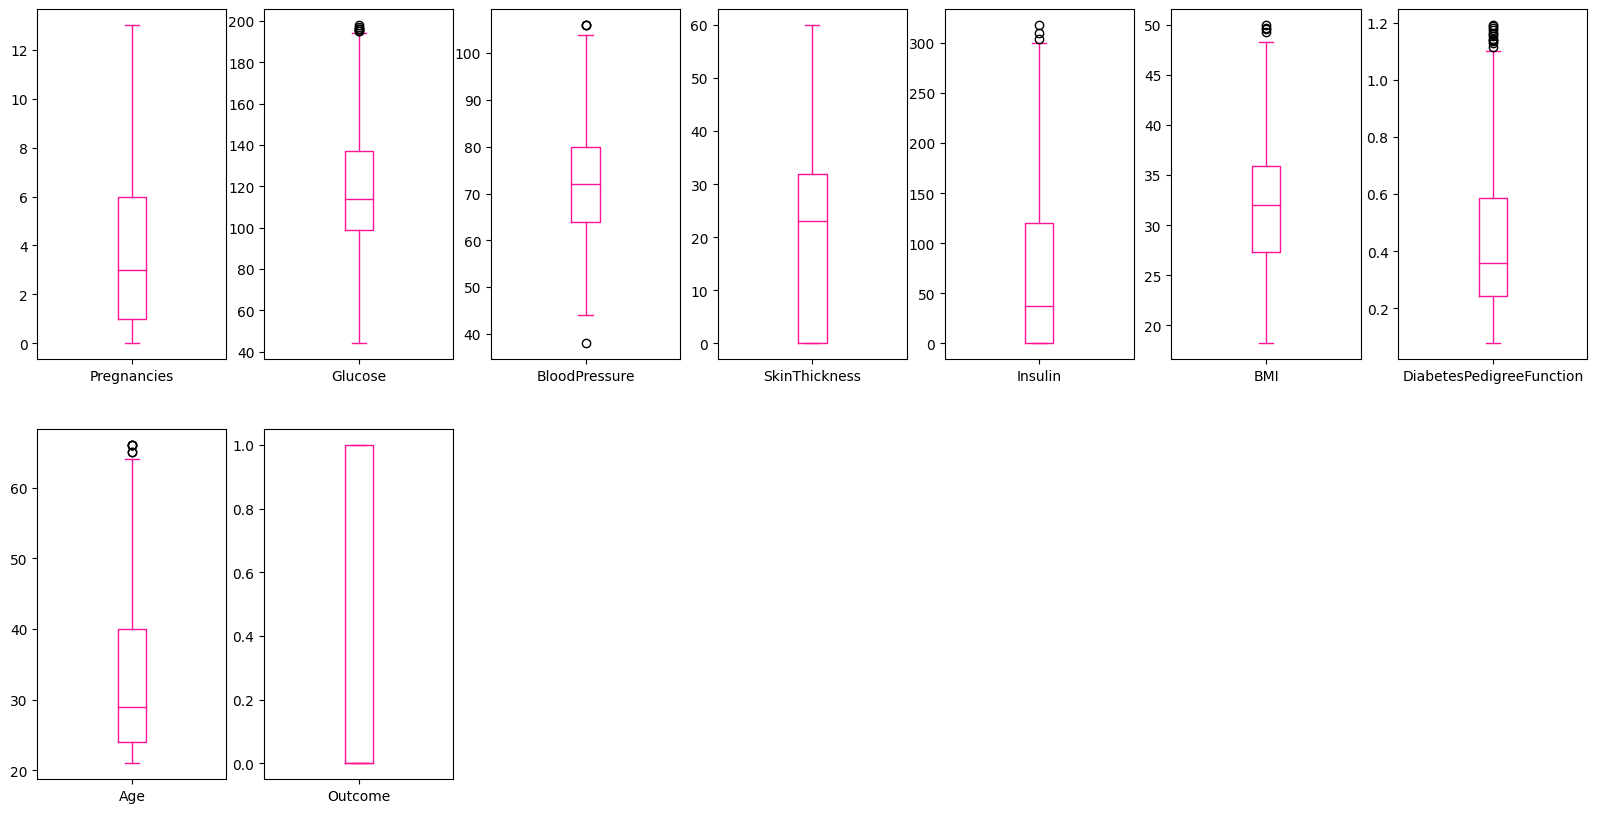

In [ ]:
df.plot(kind='box', subplots=True,
        layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='deeppink');

In [ ]:
df.shape

(639, 9)

0    439
1    200
Name: Outcome, dtype: int64


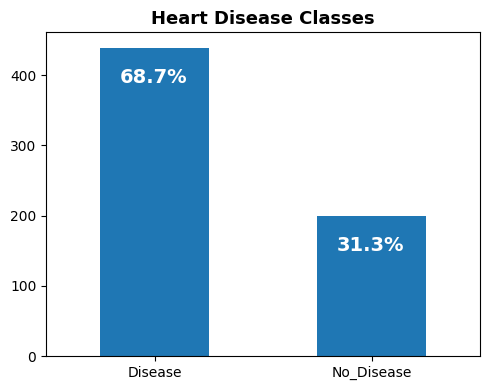

In [ ]:
#checking target value distribution
print(df.Outcome.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No_Disease"]
ax = df.Outcome.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
  totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
  ax.text(i.get_x()+.09, i.get_height()-50, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
          color='white', weight = 'bold')
plt.tight_layout()

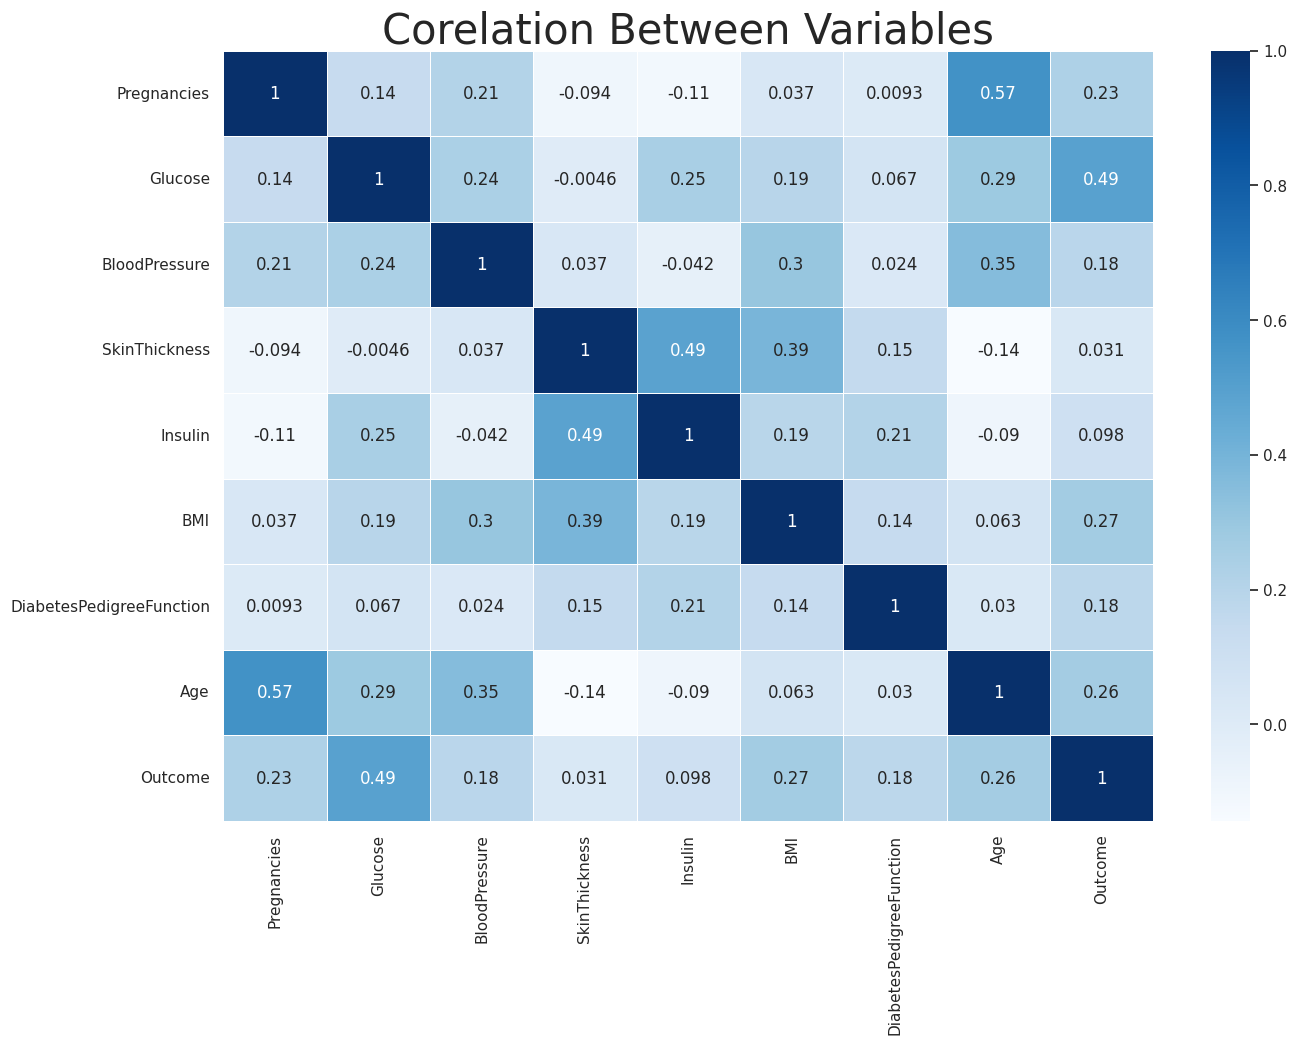

In [ ]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [ ]:
obtain

In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
profile = ProfileReport(df,title="Diabetes EDA",
                        html={'style':{'full_width':True}})
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#pre-processing
from sklearn.exceptions import DataDimensionalityWarning
#encode object columns to integers
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
for col in df:
  if df[col].dtype =='object':
    df[col]=OrdinalEncoder().fit_transform(df[col].values.reshape(-1,1))
df


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
5                       0.201   30        0  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[639 rows x 9 columns]

In [ ]:
class_label =df['Outcome']
df = df.drop(['Outcome'], axis =1)
df = (df-df.min())/(df.max()-df.min())
df['Outcome']=class_label
df

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.461538  0.675325       0.500000       0.583333  0.000000  0.484277   
1       0.076923  0.266234       0.411765       0.483333  0.000000  0.264151   
2       0.615385  0.902597       0.382353       0.000000  0.000000  0.160377   
3       0.076923  0.292208       0.411765       0.383333  0.295597  0.311321   
5       0.384615  0.467532       0.529412       0.000000  0.000000  0.232704   
..           ...       ...            ...            ...       ...       ...   
763     0.769231  0.370130       0.558824       0.800000  0.566038  0.462264   
764     0.153846  0.506494       0.470588       0.450000  0.000000  0.584906   
765     0.384615  0.500000       0.500000       0.383333  0.352201  0.251572   
766     0.076923  0.532468       0.323529       0.000000  0.000000  0.374214   
767     0.076923  0.318182       0.470588       0.516667  0.000000  0.383648   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.493261  0.644444        1  
1                    0.245283  0.222222        0  
2                    0.533693  0.244444        1  
3                    0.079964  0.000000        0  
5                    0.110512  0.200000        0  
..                        ...       ...      ...  
763                  0.083558  0.933333        0  
764                  0.235400  0.133333        0  
765                  0.150045  0.200000        0  
766                  0.243486  0.577778        1  
767                  0.212938  0.044444        0  

[639 rows x 9 columns]

In [ ]:
#pre-processing
heart_data = df.copy()
le = preprocessing.LabelEncoder()
Pregnancies = le.fit_transform(list(heart_data["Pregnancies"])) # age in years
Glucose = le.fit_transform(list(heart_data["Glucose"])) # gender (1 = male; 0 = female)
BloodPressure = le.fit_transform(list(heart_data["BloodPressure"])) # chest-pain and chest-pain type
SkinThickness = le.fit_transform(list(heart_data["SkinThickness"])) # resting blood pressure(mm/Hg)
Insulin = le.fit_transform(list(heart_data["Insulin"])) # serum cholestrol (mg/dl)
BMI = le.fit_transform(list(heart_data["BMI"])) # fasting blood sugar
Diabetes_Pedigree_Function = le.fit_transform(list(heart_data["DiabetesPedigreeFunction"])) # resting elctrocardiographic results
Age = le.fit_transform(list(heart_data["Age"]))
Outcome = le.fit_transform(list(heart_data["Outcome"]))



NameError: ignored

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
x = list(zip(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Diabetes_Pedigree_Function, Age))
y = list(Outcome)
# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'accuracy'
# Model Test/Train
# Splitting what we are trying to predict into 4 different arrays -
# X train is a section of the x array(attributes) and vise versa for Y(features)
# The test data will test the accuracy of the model created
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state=seed)
#splitting 20% of our data into test samples. If we train the model with higher data it already has seen that information and knows
#size of train and test subsets after splitting
np.shape(x_train), np.shape(x_test)


((511, 8), (128, 8))

In [ ]:
# Predictive analytics model development by comparing different Scikit-learn classification algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
print("Performance on Training set")
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)

Performance on Training set
NB: 0.759318 (0.033547)

SVM: 0.773025 (0.018588)

GBM: 0.780868 (0.030998)

RF: 0.788711 (0.025413)



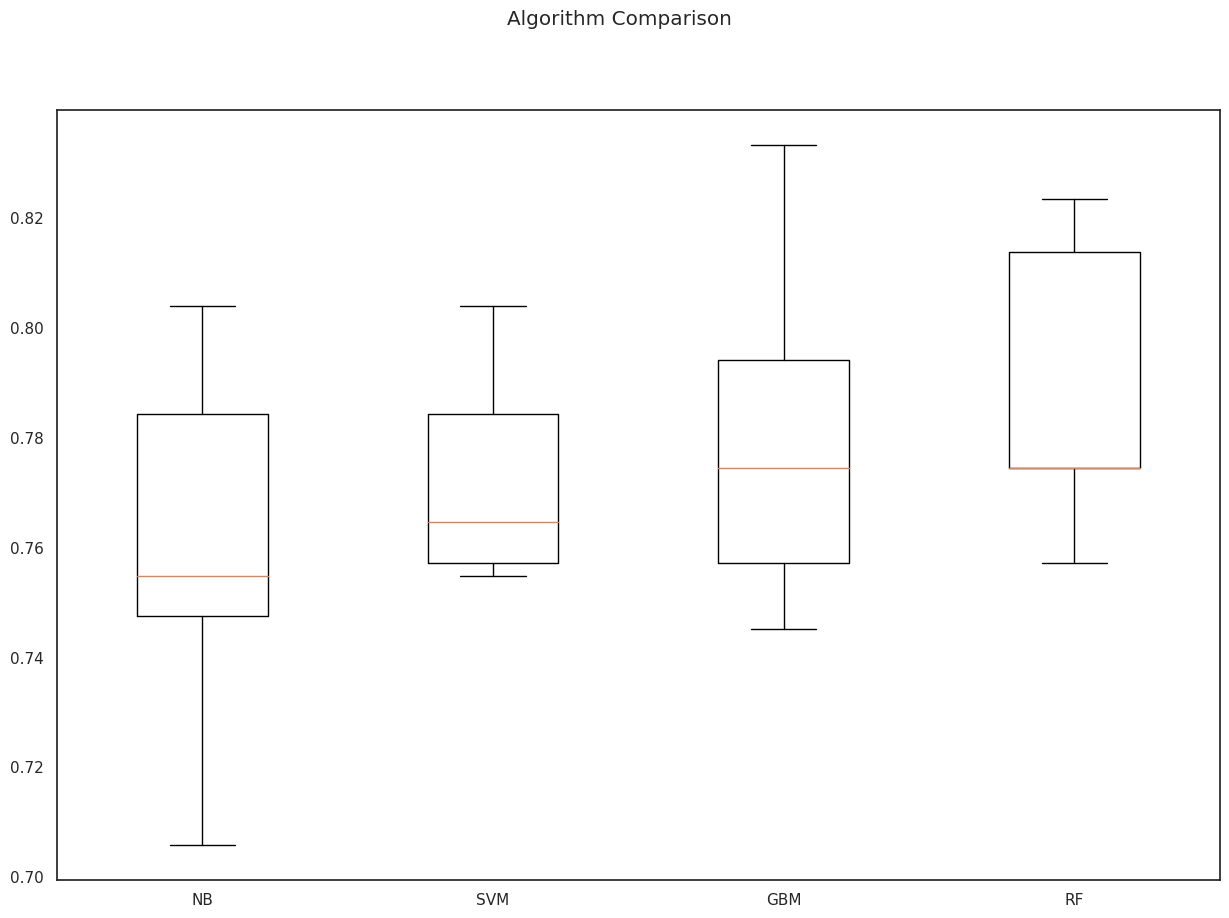

In [ ]:
# Compare Algorithms' Performance
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
best_model = rf
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Best Model Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))

Best Model Accuracy Score on Test Set: 0.7890625


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        86
           1       0.80      0.48      0.60        42

    accuracy                           0.79       128
   macro avg       0.79      0.71      0.73       128
weighted avg       0.79      0.79      0.77       128



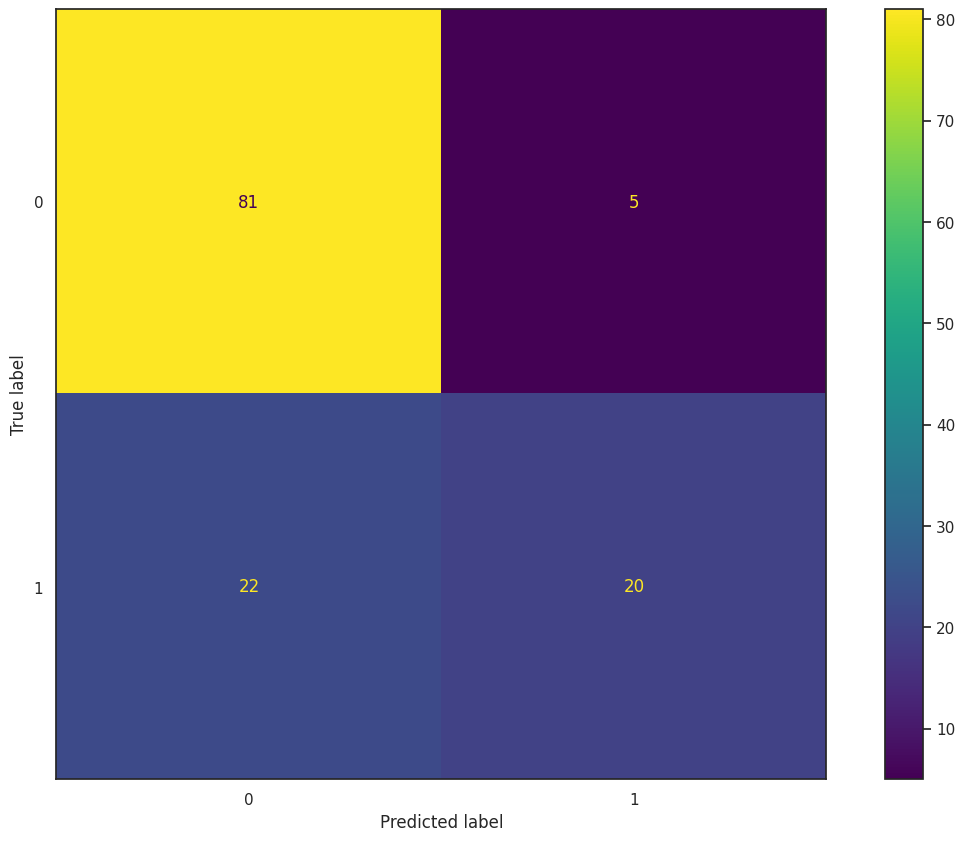

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


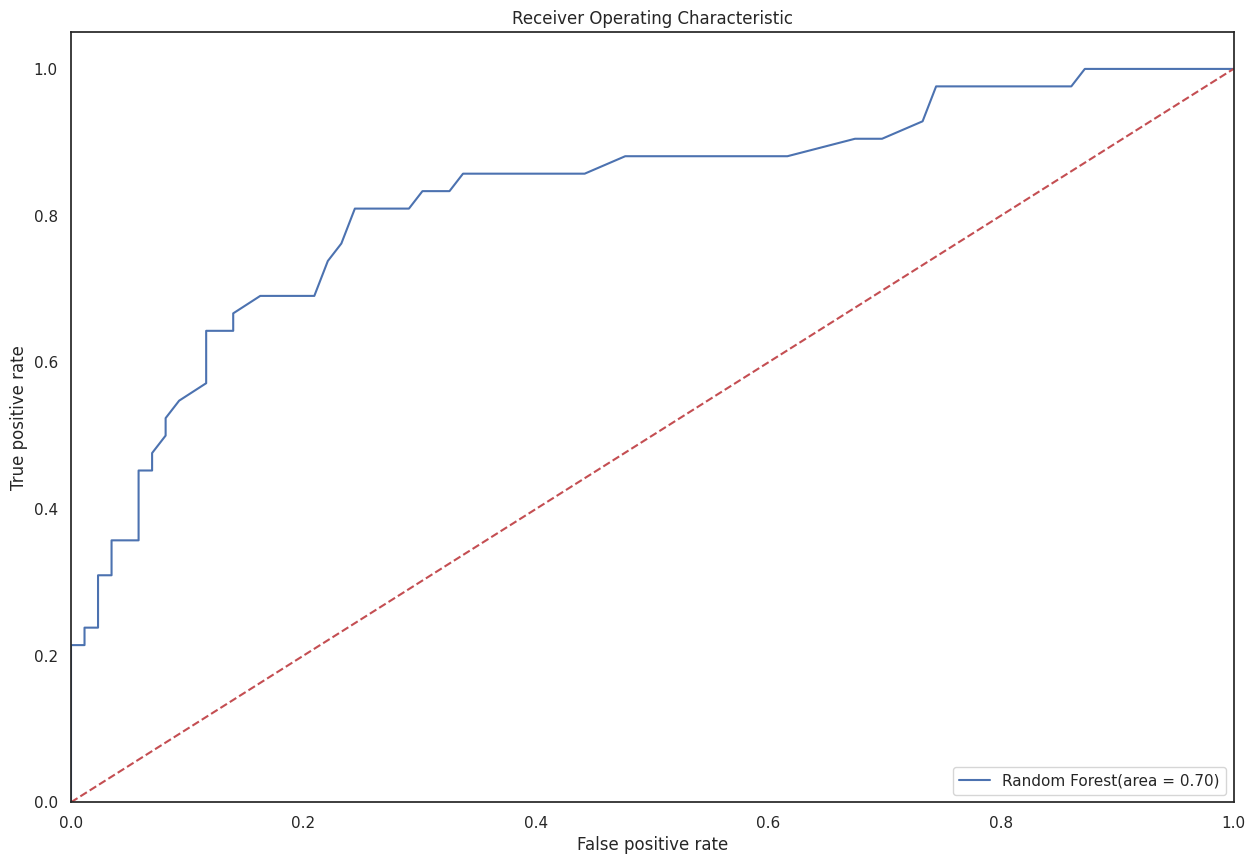

In [ ]:
#Model Evaluation Metric 3- ROC-AUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)
[:,1])
plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()


In [ ]:
#Model Evaluation Metric 4-prediction report
for x in range(len(y_pred)):
  print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)

Predicted:  0 Actual:  0 Data:  (3, 19, 17, 0, 0, 13, 201, 4)
Predicted:  0 Actual:  0 Data:  (2, 45, 13, 0, 0, 98, 41, 0)
Predicted:  0 Actual:  1 Data:  (6, 71, 17, 16, 78, 138, 285, 8)
Predicted:  0 Actual:  1 Data:  (6, 99, 12, 0, 0, 37, 56, 29)
Predicted:  0 Actual:  0 Data:  (1, 77, 19, 19, 103, 35, 388, 2)
Predicted:  1 Actual:  1 Data:  (9, 89, 22, 27, 99, 126, 404, 12)
Predicted:  1 Actual:  1 Data:  (5, 105, 13, 0, 0, 115, 21, 20)
Predicted:  0 Actual:  0 Data:  (8, 63, 28, 29, 65, 167, 177, 28)
Predicted:  0 Actual:  0 Data:  (1, 16, 10, 35, 18, 201, 340, 2)
Predicted:  0 Actual:  0 Data:  (8, 5, 18, 16, 0, 106, 311, 21)
Predicted:  0 Actual:  0 Data:  (9, 60, 17, 37, 58, 116, 191, 19)
Predicted:  1 Actual:  1 Data:  (3, 106, 19, 12, 73, 90, 122, 10)
Predicted:  0 Actual:  0 Data:  (0, 30, 10, 0, 0, 137, 118, 4)
Predicted:  0 Actual:  0 Data:  (1, 32, 15, 6, 10, 6, 165, 4)
Predicted:  0 Actual:  0 Data:  (5, 60, 19, 33, 44, 125, 123, 7)
Predicted:  0 Actual:  1 Data:  (10, 9